Text(0, 0.5, 'Origin')

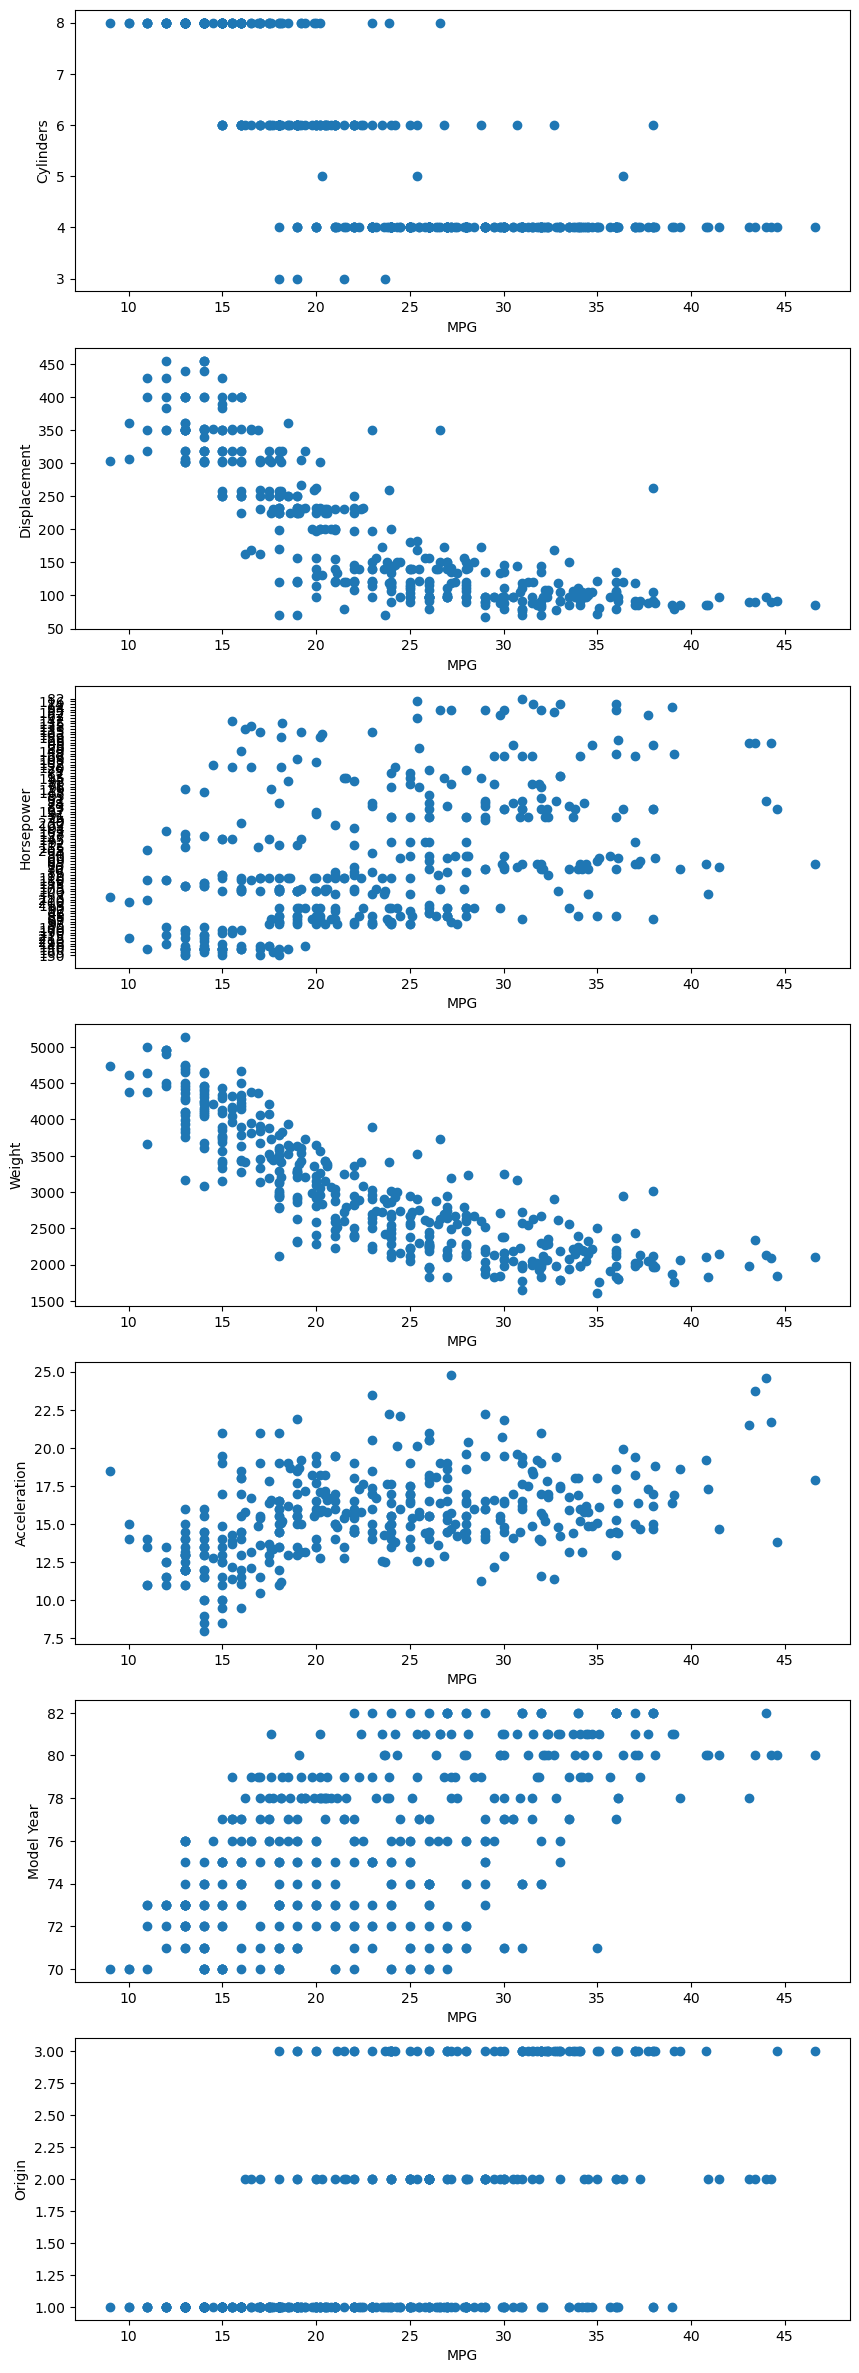

In [48]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("auto-mpg.csv")

fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7) = plt.subplots(7, 1, figsize=(10,30))

ax1.plot(data['mpg'], data['cylinders'], 'o')
ax1.set_xlabel("MPG")
ax1.set_ylabel("Cylinders")

ax2.plot(data['mpg'], data['displacement'], 'o')
ax2.set_xlabel("MPG")
ax2.set_ylabel("Displacement")

ax3.plot(data['mpg'], data['horsepower'], 'o')
ax3.set_xlabel("MPG")
ax3.set_ylabel("Horsepower")

ax4.plot(data['mpg'], data['weight'], 'o')
ax4.set_xlabel("MPG")
ax4.set_ylabel("Weight")

ax5.plot(data['mpg'], data['acceleration'], 'o')
ax5.set_xlabel("MPG")
ax5.set_ylabel("Acceleration")

ax6.plot(data['mpg'], data['model year'], 'o')
ax6.set_xlabel("MPG")
ax6.set_ylabel("Model Year")

ax7.plot(data['mpg'], data['origin'], 'o')
ax7.set_xlabel("MPG")
ax7.set_ylabel("Origin")


In [49]:
#Step 2
for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors ='coerce')
horse_med = data['horsepower'].median()
data['horsepower'] = data['horsepower'].fillna(horse_med)

In [50]:
#Step 3

data['Cylinders_Normalized'] = (data['cylinders'] - data['cylinders'].mean()) / data['cylinders'].std()
data['Displacement_Normalized'] = (data['displacement'] - data['displacement'].mean()) / data['displacement'].std()
data['Horsepower_Normalized'] = (data['horsepower'] - data['horsepower'].mean()) / data['horsepower'].std()
data['Weight_Normalized'] = (data['weight'] - data['weight'].mean()) / data['weight'].std()
data['Acceleration_Normalized'] = (data['acceleration'] - data['acceleration'].mean()) / data['acceleration'].std()
data['Model_Year_Normalized'] = (data['model year'] - data['model year'].mean()) / data['model year'].std()
data['Origin_Normalized'] = (data['origin'] - data['origin'].mean()) / data['origin'].std()

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     255.4
Date:                Wed, 20 Sep 2023   Prob (F-statistic):          2.15e-141
Time:                        23:20:37   Log-Likelihood:                -1040.3
No. Observations:                 398   AIC:                             2097.
Df Residuals:                     390   BIC:                             2128.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

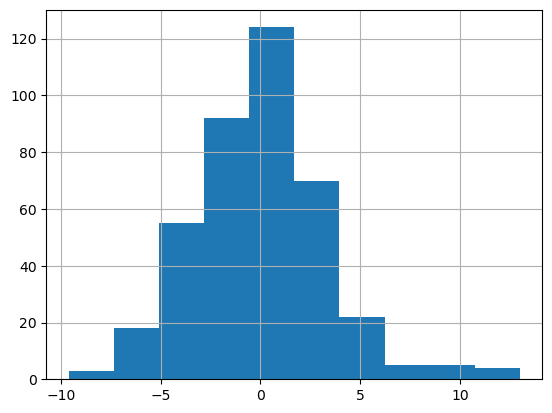

In [51]:
import statsmodels.formula.api as smf
import numpy as np

model = smf.ols('mpg ~ Cylinders_Normalized + Displacement_Normalized + Horsepower_Normalized + Weight_Normalized + Acceleration_Normalized + Model_Year_Normalized + Origin_Normalized', data=data)
model = model.fit()
print(model.summary())

# Predict values
data_pred = model.predict()

# Add this prediction to the DataFrame
data['Data_Predicted'] = data_pred

# Add the DIFFERENCE between mpg data and prediction to the DataFrame
data['Data_Residual'] = data['mpg'] - data_pred

#Create Histogram
data['Data_Residual'].hist()

#Std of data
print('Std of data = ',np.std(data['Data_Residual']))

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     202.0
Date:                Wed, 20 Sep 2023   Prob (F-statistic):           6.15e-94
Time:                        23:20:37   Log-Likelihood:                -1160.3
No. Observations:                 398   AIC:                             2331.
Df Residuals:                     393   BIC:                             2350.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

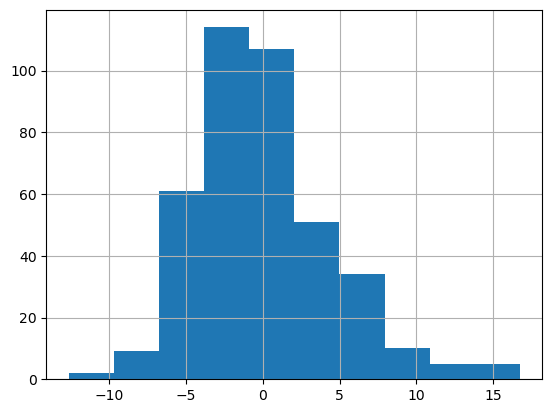

In [52]:
model = smf.ols('mpg ~ Cylinders_Normalized + Displacement_Normalized + Horsepower_Normalized  + Acceleration_Normalized', data=data)
model = model.fit()
print(model.summary())

# Predict values
data_pred = model.predict()

# Add this prediction to the DataFrame
data['Data_Predicted'] = data_pred

# Add the DIFFERENCE between mpg data and prediction to the DataFrame
data['Data_Residual'] = data['mpg'] - data_pred

#Create Histogram
data['Data_Residual'].hist()

#Std of data
print('Std of data = ',np.std(data['Data_Residual']))

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     105.6
Date:                Wed, 20 Sep 2023   Prob (F-statistic):          1.13e-157
Time:                        23:20:37   Log-Likelihood:                -945.09
No. Observations:                 398   AIC:                             1948.
Df Residuals:                     369   BIC:                             2064.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

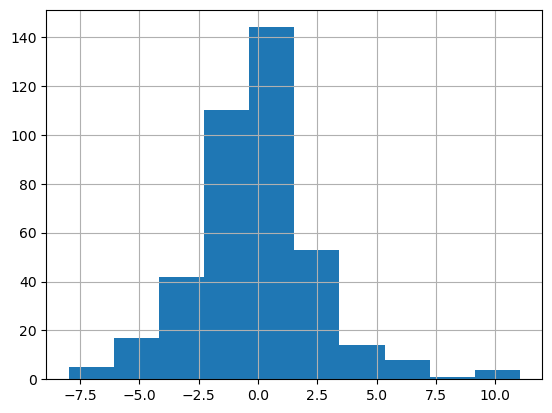

In [53]:
model = smf.ols('mpg ~ Cylinders_Normalized + Displacement_Normalized + Horsepower_Normalized + Weight_Normalized + Acceleration_Normalized + Model_Year_Normalized + Origin_Normalized + (Cylinders_Normalized * Displacement_Normalized) + (Cylinders_Normalized * Horsepower_Normalized) + (Cylinders_Normalized * Weight_Normalized) + (Cylinders_Normalized * Acceleration_Normalized) + (Cylinders_Normalized * Model_Year_Normalized) + (Cylinders_Normalized * Origin_Normalized) + (Displacement_Normalized * Horsepower_Normalized) + (Displacement_Normalized * Weight_Normalized) + (Displacement_Normalized * Acceleration_Normalized) + (Displacement_Normalized * Model_Year_Normalized) + (Displacement_Normalized * Origin_Normalized) + (Horsepower_Normalized * Weight_Normalized) + (Horsepower_Normalized * Acceleration_Normalized) + (Horsepower_Normalized * Model_Year_Normalized) + (Horsepower_Normalized * Origin_Normalized) + (Weight_Normalized * Acceleration_Normalized) + (Weight_Normalized * Model_Year_Normalized) + (Weight_Normalized * Origin_Normalized) + (Acceleration_Normalized * Model_Year_Normalized) + (Acceleration_Normalized * Origin_Normalized) + (Model_Year_Normalized * Origin_Normalized)', data=data)
model = model.fit()
print(model.summary())

# Predict values
data_pred = model.predict()

# Add this prediction to the DataFrame
data['Data_Predicted'] = data_pred

# Add the DIFFERENCE between mpg data and prediction to the DataFrame
data['Data_Residual'] = data['mpg'] - data_pred

#Create Histogram
data['Data_Residual'].hist()

#Std of data
print('Std of data = ',np.std(data['Data_Residual']))